In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [15]:
df= pd.read_csv('SampleData.csv')

In [16]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [17]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [18]:
df.rename(columns={'Hours of Study':'Hours','Marks':'Marks'},inplace=True)

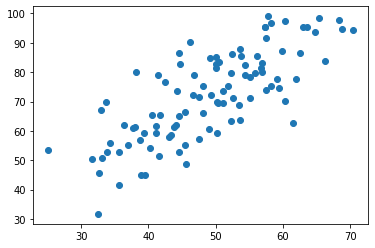

In [19]:
plt.scatter(df.Hours,df.Marks)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

In [24]:
y = df.iloc[:,-1].values
x=df.iloc[:,:-1].values

In [25]:
y.reshape(-1,1)

array([[31.70700585],
       [68.77759598],
       [62.5623823 ],
       [71.54663223],
       [87.23092513],
       [78.21151827],
       [79.64197305],
       [59.17148932],
       [75.3312423 ],
       [71.30087989],
       [55.16567715],
       [82.47884676],
       [62.00892325],
       [75.39287043],
       [81.43619216],
       [60.72360244],
       [82.89250373],
       [97.37989686],
       [48.84715332],
       [56.87721319],
       [83.87856466],
       [98.5912173 ],
       [57.25181946],
       [51.39174408],
       [75.38065167],
       [74.76556403],
       [95.45505292],
       [95.22936602],
       [79.05240617],
       [83.43207142],
       [63.35879032],
       [41.4128853 ],
       [76.61734128],
       [96.76956643],
       [74.08413012],
       [66.58814441],
       [77.76848242],
       [50.71958891],
       [62.12457082],
       [60.81024665],
       [52.68298337],
       [58.56982472],
       [82.90598149],
       [61.4247098 ],
       [95.2441528 ],
       [45

In [26]:
standscale= StandardScaler()

In [27]:
x= standscale.fit_transform(x.reshape(-1,1))
y= standscale.fit_transform(y.reshape(-1,1))

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x_train.shape

(80, 1)

In [31]:
model= SVR(kernel='rbf')

In [32]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred=model.predict(x_test)

In [34]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [35]:
y_test=standscale.inverse_transform(y_test)

In [36]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

In [37]:
y_pred=standscale.inverse_transform(y_pred)
y_pred

array([60.39764577, 81.48677868, 66.49889641, 52.93601862, 80.71338315,
       70.24215505, 60.59170512, 65.92240434, 56.96814488, 86.44247075,
       88.27618157, 77.33308614, 63.51595177, 64.15643611, 73.17585776,
       90.56964555, 92.26453877, 82.25831189, 63.41941707, 62.23679956])

In [40]:

standscale.inverse_transform(model.predict([[10]]))

array([71.50346437])

In [41]:
standscale.inverse_transform(model.predict([[2]]))

array([92.55111091])

In [43]:
standscale.inverse_transform(model.predict([[15]]))

array([71.50346437])

In [44]:
r2_score(y_test,y_pred)

0.5943071038285546

In [45]:
mean_squared_error(y_test,y_pred)

87.23306900235278

In [46]:
mean_absolute_error(y_test,y_pred)

6.933427431006026